# IFT6269 - Homework 1 - Maximum Likelihood Estimation

**Due**: Tuesday, September 27th, 2022

#### Name: Tejas Vaidhya
#### Student ID: uv56320
#### Collaborators: Sophia Gunluk



### Introduction

In this question, we are going to numerically explore the MLE of the variance parameter of the Gaussian  

### Tasks
0.   Get your own copy of this file via "File > Save a copy in Drive...";
1.   Fill your personal information and collaborators at the top of this assignment, and rename the notebook accordingly, e.g., `hw1_thomasBayes.ipynb`;
2.   Read the instructions provided on each section and cell carefully;
3.   Implement the missing features for the functions in section **Playground**;
4.   Answer the questions in section **Gaussian Maximum Likelihood Estimation**;
5.   Share your notebook with `ift6269f22@gmail.com` ("Share" button on the top-right corner);
6.   Share the link of your notebook on Gradescope ("Share > Copy Link", and paste the link in "Homework 1 (Programming & Checklist)" on Gradescope).
    
**Important**: You are allowed to collaborate with other students in both the math and coding parts of this assignment. However, the answers provided here must reflect your individual work. For that reason, you are not allowed to share this notebook, except for your submission to the TA for grading. **Don't forget to pin and save the version of the notebook you want to be graded on!**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Playground

You are allowed to add as many cells and functions as you wish in this section, but not allowed to change the signature (name and inputs) of the provided functions! Please add all your new auxiliary functions here. 

In [ ]:
def sample_gaussian_data(num_samples, num_trials):
    """
    # TODO 
    Generate num_trials sets of samples of a *standard* 1-d Gaussian random variable.
    Each set of samples contains num_sample samples

        Inputs:
            num_samples: [int] Number of samples to generate per trial
            num_trials: [int] Number of trials to generate
        
        Returns:
            samples: [num_samples, num_trials] Vector of generated samples
    """

    # TODO
    mu, sigma = 0, 1
    samples = np.zeros((num_samples, num_trials))
    for i in range(num_trials):
        samples[:,i] = np.sqrt(sigma)*np.random.randn(num_samples) + mu

    return samples

def mu_sigma2_mle(samples):
    """
    # TODO 
    Compute Gaussian MLE estimators for the mean and variance 
        Inputs:
             samples: [num_samples, num_trials] Matrix of N(0, 1) iid samples. 
                      It contains num_trials sets, each of these sets containing
                      num_samples samples.
        
        Returns:
             mu_hat: [num_trials] Vector of MLE mean estimators for each trial
             sigma2_hat: [num_trials] Vector of MLE variance estimators for each trial
             
    """
    # Useful dimensions
    num_samples, num_trials = samples.shape

    #TODO
    mu_hat = np.zeros(num_trials)
    sigma2_hat = np.zeros(num_trials)

    for i in range(num_trials):
        mu_hat[i] = np.mean(samples[:,i])
        sigma2_hat[i] = np.var(samples[:,i])

    return mu_hat, sigma2_hat

def freq_mean_var(x):
    """
    # TODO 
    Compute the frequentist mean and variance of a vector of n real numbers 
        Inputs:
             x: [n] Vector of real numbers
        
        Returns:
             (mean, var): [tuple] Frequentist mean and variance of x
             
    """

    #TODO
    mean = np.mean(x)
    var = np.var(x)

    return (mean, var)

def empirical_frequentist_bias(empirical_mean, true_mean):
    """
    # TODO 
    Estimate the frequentist bias of an estimator given its empirical and true means 
        Inputs:
             true_mean: [float] True mean of the estimator
             empirical_mean: [float] Empirical mean of the estimator
             
        Returns:
             bias: [float] Frequentist bias
            
    """

    #TODO
    bias = 0
    bias = empirical_mean - true_mean
    return bias

def plot_sigma_hat_histogram(samples, bins=200):
    """
    Plots a histogram of a estimated variances 
        Inputs:
            samples: [array] Estimated variances to be plotted

    """
    # Plot histogram with custom bins for readability.
    plt.hist(samples, bins=bins, alpha=0.8, label=r'$\hat{\sigma}$' +' histogram');
    plt.ylabel('Counts')
    plt.xlabel(r'$\hat{\sigma^2}$')
    plt.legend();

## Gaussian Maximum Likelihood Estimation


In this section **DO NOT** change the code in any of the cells, unless explicitly stated. Simply answer the questions in the corresponding text cells after having executed your implementation. If you have respected the signature of the functions above in terms of inputs and outputs, your code should run.

### Sample generation

Use the functions defined above to draw $n=5$ samples from the standard Gaussian distribution, $\mathcal{N}(0,1)$.

In [ ]:
NUM_SAMPLES = 5

samples = sample_gaussian_data(num_samples=NUM_SAMPLES, num_trials=1)

print('Generated Gaussian samples')
print(samples)

Generated Gaussian samples
[[-1.28371761]
 [-0.76764836]
 [-0.50803288]
 [ 1.92824264]
 [-0.53505732]]


### MLE computation
Compute the ML estimate $\hat{\mu}$ for the mean and $\hat{\sigma}^2$ for the variance of the Gaussian, as given in Question 3(d). 

In [ ]:
mu_hat, sigma2_hat = mu_sigma2_mle(samples)

print('MLE mean - variance')
print(mu_hat, sigma2_hat)

MLE mean - variance
[-0.2332427] [1.2455415]


### MLE computation
Repeat the previous steps 10,000 times.  Plot a histogram of the 10,000 estimates of the Gaussian  variance  parameter  to  show  its  empirical  distribution.

In [ ]:
NUM_TRIALS = int(1e4)
samples = sample_gaussian_data(num_samples=NUM_SAMPLES, num_trials=NUM_TRIALS)
_, sigma2_hat_vec = mu_sigma2_mle(samples)

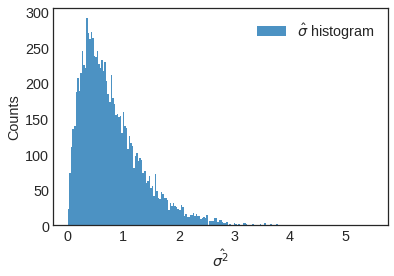

In [ ]:
plot_sigma_hat_histogram(sigma2_hat_vec)

**Question:** Do you recognize the shape of this histogram? What is it? 

**Answer:** Histogram is a Gamma Distirbution.

let $X_i$ ∀ i $\in$ {1,2, ... N}  
are standard normal random variables

$σ^2\chi^2_{n-1} ∼ \sum_{i=1}^n(X_i - \bar{X}^2) $

(Cochran's theorem)

and, 
$\chi^2_{n-1} = Γ(n-1/2, 2)$ (special case of gamma distribution)

Hence, 

$\hat{σ}^2$ = $1/n \sum_{i=1}^n(X_i - \bar{X}^2)$

$\hat{σ}^2$ ∼ $σ^2Χ^2_{n-1}/n $, where σ^2/n is constant 

$\hat{σ}^2$ must be gamma distribution with a constant factor of σ^2/n 





### Bias and variance of the *estimator*
Use *the same* 10,000 repeated trials to numerically estimate the (frequentist) bias and variance of the ML estimate $\hat{\sigma}^2$ of the Gaussian variance parameter.

Compare the results with the theoretical (frequentist) bias and variance that you can compute from the formula you derived in Question 3(d). 

*Hint: if your numerical estimates are very far from the theoretical formula, you made a mistake somewhere!*

In [ ]:
sigma2_hat_mean, sigma2_hat_var = freq_mean_var(sigma2_hat_vec)

TRUE_SIGMA2 = 1.

# In the next lines, fill in the theoretical bias and variance of $\hat{\sigma}^2$
THEO_BIAS = -TRUE_SIGMA2/(NUM_SAMPLES) # -\sigma^2/N
THEO_VAR = 2.0* (NUM_SAMPLES-1) * (TRUE_SIGMA2 **2)/(NUM_SAMPLES**2) # (2*(N-1)*\sigma^4 )/(N^2)

emp_bias = empirical_frequentist_bias(empirical_mean=sigma2_hat_mean,
                                      true_mean=TRUE_SIGMA2)

print('Theoretical Bias: ', THEO_BIAS, ' Freq. Estimated Bias: ', emp_bias)
print('Theoretical Variance: ', THEO_VAR, ' Freq. Estimated Variance: ', sigma2_hat_var)

Theoretical Bias:  -0.2  Freq. Estimated Bias:  -0.1992901532484862
Theoretical Variance:  0.32  Freq. Estimated Variance:  0.3202918005950878


**Question:** What conclusions can you draw from the result of this comparison?

**Answer:** It validates Law of large number which states that  the average of the results obtained from a large number of trials should be close to the expected values and tends to become closer to the expected value as more trials are performed